# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

## Data Overview

- Observations
- Sanity checks

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Elective Projects - Practical Data Science/ExtraaLearn.csv')

In [4]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [6]:
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

In [7]:
# Drop ID which does not provide any value to our training
df = df.drop(['ID'], axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

In [9]:
# Create lists of numerical and categorical columns
num_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
cat_cols = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2',
            'digital_media', 'educational_channels', 'referral', 'status']

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [10]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


Based on the summary statistics provided for four variables (age, website visits, time spent on website, and page views per visit), here are some insights we can derive:

1. **Age**:
   - The data includes ages ranging from 18 to 63 years, with an average age of about 46 years.
   - The majority of leads are closer to the upper age limit, indicated by the median age of 51 and the 75th percentile at 57 years.
   - The age data appears slightly left-skewed since the mean is less than the median.

2. **Website Visits**:
   - Leads visited the website between 0 and 30 times, but on average, a lead visits about 3.57 times.
   - The data has a high standard deviation relative to the mean, suggesting a wide variance in the number of visits among leads.
   - The distribution may be right-skewed as indicated by a median of 3, and a mean that is slightly higher.

3. **Time Spent on Website**:
   - The total time spent on the website by leads varies significantly, ranging from 0 to 2537 minutes.
   - On average, leads spend about 724 minutes, but with a large standard deviation, indicating considerable disparity in engagement.
   - The data is highly right-skewed, suggested by a median significantly lower than the mean (376 vs. 724 minutes), and a large difference between the 75th percentile and the maximum.

4. **Page Views per Visit**:
   - The average number of pages viewed per visit is about 3.03, but again, this varies significantly among leads, ranging from 0 to over 18 pages.
   - This variable also exhibits a right-skewed distribution (mean is greater than the median and a higher 75th percentile relative to the maximum).

From these statistics, we can infer that there is a diverse range of engagement levels among the leads, with some showing very high interaction (high page views, frequent visits, and long time spent) while others have minimal engagement. The skewness in the distributions for time spent and page views suggests that while some leads engage deeply, many do not.

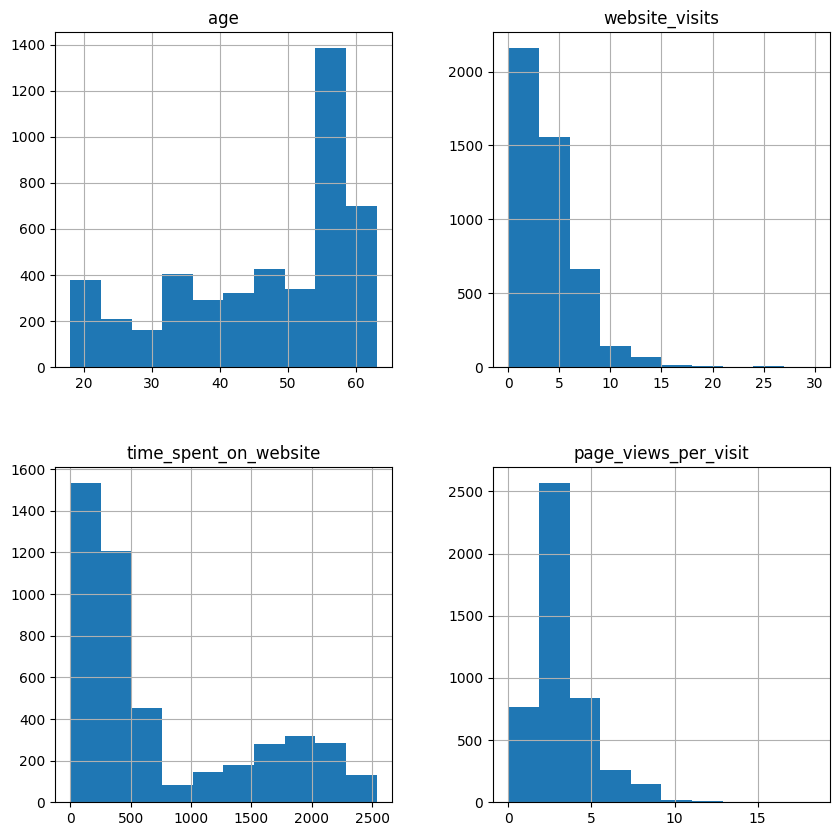

In [11]:
# Creating histograms
df[num_cols].hist(figsize = (10, 10))

plt.show()

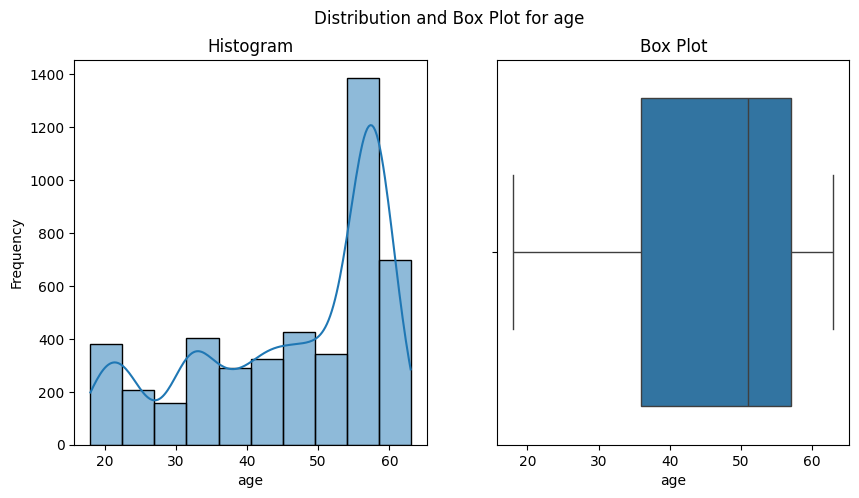

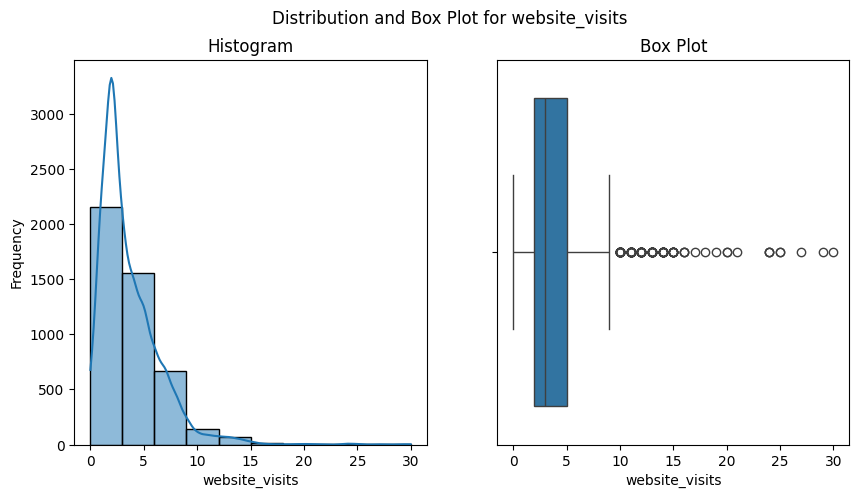

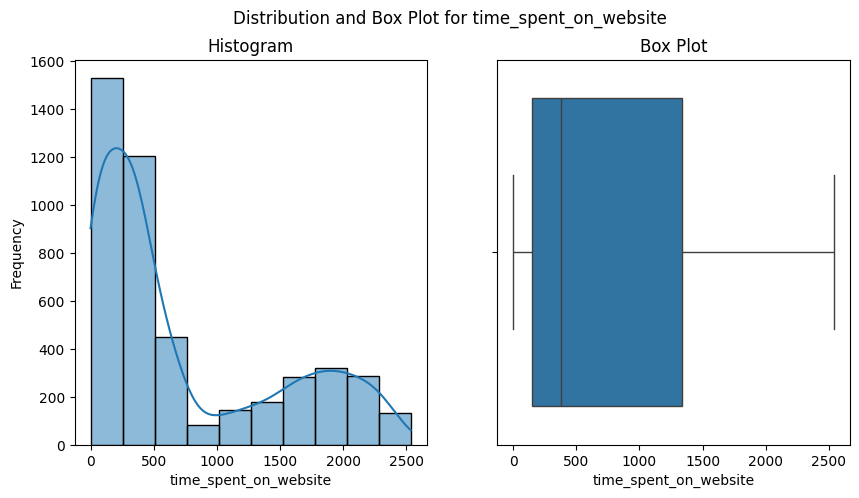

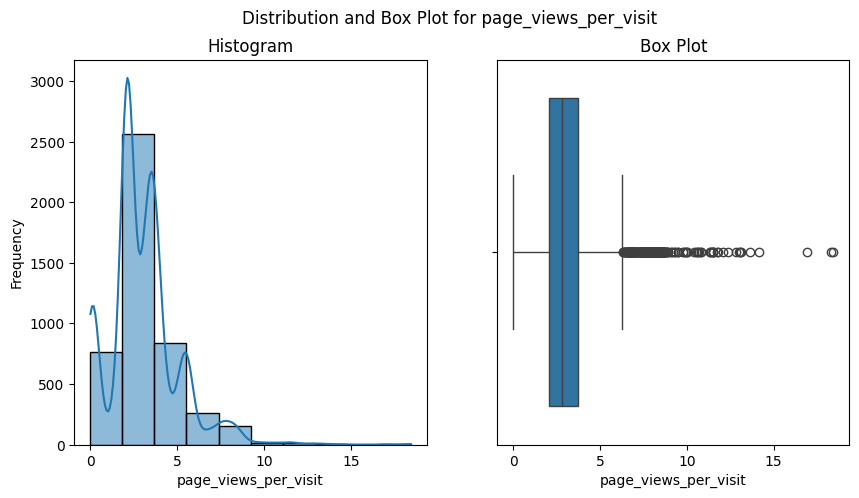

In [12]:
# Plotting distributions and box plots for each numerical column
for column in df[num_cols].columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    fig.suptitle(f'Distribution and Box Plot for {column}')

    # Histogram
    sns.histplot(df[num_cols][column], bins=10, kde=True, ax=axes[0])
    axes[0].set_title('Histogram')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # Box Plot
    sns.boxplot(x=df[num_cols][column], ax=axes[1])
    axes[1].set_title('Box Plot')
    axes[1].set_xlabel(column)

    plt.show()

In [13]:
# Printing the % sub categories of each category.
for i in cat_cols:

    print(df[i].value_counts(normalize = True))

    print('*' * 40)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
****************************************
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
****************************************
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
****************************************
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
****************************************
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
****************************************
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
****************************************
digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64
****************************************
educ




### 1. Current Occupation
- **Professionals** make up the majority (56.72%) of the leads, followed by **Unemployed** (31.24%) and **Students** (12.04%). This suggests that the services or products offered are most appealing to professionals, perhaps due to their disposable income or specific professional needs.

### 2. First Interaction
- The **Website** is slightly more popular (55.12%) as a first point of contact compared to the **Mobile App** (44.88%). This could indicate that the website might be more accessible or promoted, or it could suggest user preferences for more comprehensive interactions via desktop environments.

### 3. Profile Completed
- A high percentage of leads have either a **High** (49.09%) or **Medium** (48.59%) level of profile completion, with very few having a **Low** level (2.32%). This high level of engagement in profile completion might correlate with a higher interest or intent in the services offered.

### 4. Last Activity
- The most common last activity recorded is **Email Activity** (49.39%), followed by **Phone Activity** (26.76%) and **Website Activity** (23.85%). Email remains a critical tool for engagement, potentially due to its direct and personalized nature.

### 5. Print Media Type1 and Type2
- A small fraction of leads have seen ads in **Newspapers** (10.78%) and even fewer in **Magazines** (5.05%). This low engagement with print media could suggest that these channels are less effective or that the target audience prefers digital sources.

### 6. Digital Media
- Similar to print media, a small proportion of leads have seen ads on **digital platforms** (11.43%). Despite being a digital medium, this still shows a low engagement rate, which could point to either the nature of the ad campaigns or the platforms chosen not aligning well with the target audience.

### 7. Educational Channels
- A significant minority (15.29%) heard about the service through **educational channels**. This is higher than print and digital media but still suggests niche targeting or limited reach through these channels.

### 8. Referral
- Very few leads came through **referrals** (2.02%), indicating that referral programs may not be effectively incentivized or promoted, or that existing customers might not be sufficiently satisfied or motivated to refer others.

### 9. Status
- The conversion rate is 29.86%, indicating that about a third of all leads end up purchasing or subscribing to the service. This rate could be considered in various lights depending on industry standards, but generally, there's room for improvement in converting leads to customers.

### Summary
From this analysis, it's clear that while there's good engagement in terms of profile completion and initial contact via the website, conversion channels like digital and print media, and referrals are underperforming.

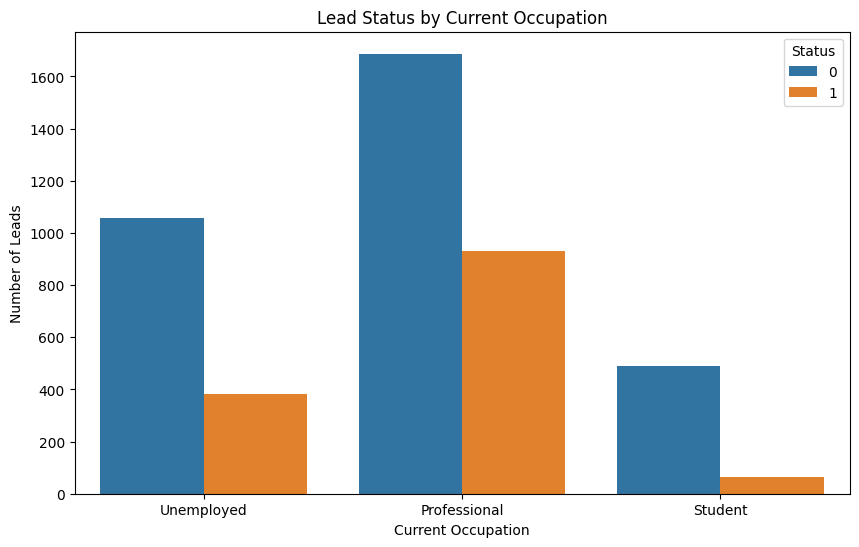

Chi-squared Test:
Chi-squared value: 134.59904099211036
Degrees of freedom: 2
P-value: 5.918199675434894e-30

Expected Frequencies:
[[1834.94362533  781.05637467]
 [ 389.29423244  165.70576756]
 [1010.76214224  430.23785776]]

There is a statistically significant association between current occupation and lead status.


In [14]:
from scipy.stats import chi2_contingency


# Visualization of occupation by status
plt.figure(figsize=(10, 6))
sns.countplot(x='current_occupation', hue='status', data=df)
plt.title('Lead Status by Current Occupation')
plt.xlabel('Current Occupation')
plt.ylabel('Number of Leads')
plt.legend(title='Status')
plt.show()

# Preparing data for chi-squared test
contingency_table = pd.crosstab(df['current_occupation'], df['status'])

# Chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-squared Test:")
print("Chi-squared value:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p_value)
print("\nExpected Frequencies:")
print(expected)

# Evaluate the significance
if p_value < 0.05:
    print("\nThere is a statistically significant association between current occupation and lead status.")
else:
    print("\nNo statistically significant association was found between current occupation and lead status.")


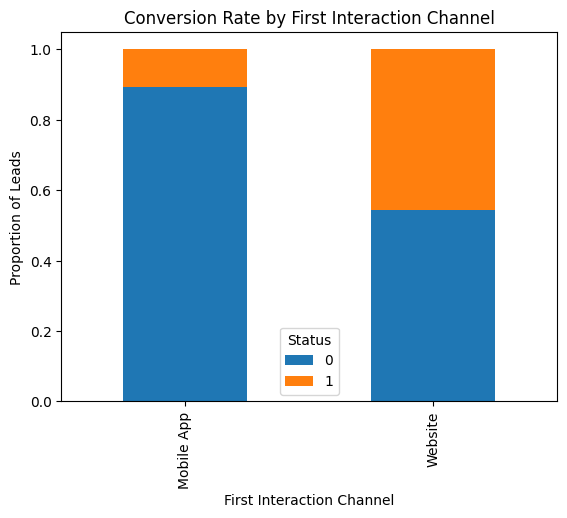

Chi-squared Test results:
Chi-squared statistic: 668.0813826411269
Degrees of freedom: 1
P-value: 2.611251831709229e-147

There is a statistically significant association between first interaction and lead status.


In [15]:
# Calculate conversion rates
conversion_summary = df.groupby('first_interaction')['status'].value_counts(normalize=True).unstack()
conversion_summary.fillna(0, inplace=True)  # In case any interaction has no entries for a status

# Visualization with a bar chart
conversion_summary.plot(kind='bar', stacked=True)
plt.title('Conversion Rate by First Interaction Channel')
plt.xlabel('First Interaction Channel')
plt.ylabel('Proportion of Leads')
plt.legend(title='Status')
plt.show()

# Prepare data for chi-squared test
contingency_table = pd.crosstab(df['first_interaction'], df['status'])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-squared test
print("Chi-squared Test results:")
print("Chi-squared statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p_value)

# Evaluate the significance
if p_value < 0.05:
    print("\nThere is a statistically significant association between first interaction and lead status.")
else:
    print("\nNo statistically significant association was found between first interaction and lead status.")


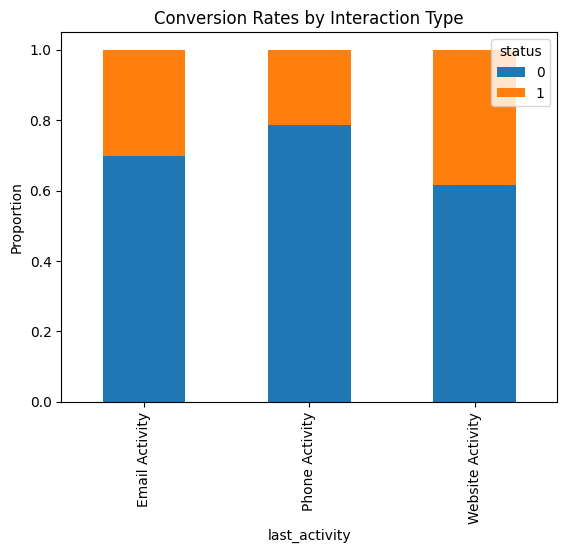

Optimization terminated successfully.
         Current function value: 0.600629
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                 4612
Model:                          Logit   Df Residuals:                     4609
Method:                           MLE   Df Model:                            2
Date:                Sun, 21 Apr 2024   Pseudo R-squ.:                 0.01479
Time:                        10:26:36   Log-Likelihood:                -2770.1
converged:                       True   LL-Null:                       -2811.7
Covariance Type:            nonrobust   LLR p-value:                 8.639e-19
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.8315      0.046    -18.243     

In [16]:
# Visualize the data with a stacked bar chart
conversion_rates = df.pivot_table(index='last_activity', columns='status', aggfunc='size', fill_value=0)
conversion_rates_prop = conversion_rates.div(conversion_rates.sum(axis=1), axis=0)
conversion_rates_prop.plot(kind='bar', stacked=True)
plt.ylabel('Proportion')
plt.title('Conversion Rates by Interaction Type')
plt.show()

# Prepare data for logistic regression
# Creating dummy variables for categorical features
df_copy = df.copy()
df_dummy = pd.get_dummies(df_copy, columns=['last_activity'], drop_first=True, dtype=np.int64)

import statsmodels.api as sm

# Logistic regression model
X = df_dummy[['last_activity_Phone Activity', 'last_activity_Website Activity']]  # independent variables
y = df_dummy['status']  # dependent variable
X = sm.add_constant(X)  # adding a constant

model = sm.Logit(y, X)
result = model.fit()

# Print the logistic regression results
print(result.summary())




### Coefficients
- **const**: The coefficient for the intercept (constant term) is -0.8315, with a highly significant p-value (close to zero), indicating that when all the predictors are 0, the log-odds of 'conversion' is -0.8315.
- **last_activity_Phone Activity**: The coefficient (-0.4747) suggests that having a last activity as a Phone Activity, compared to the reference group (likely Email Activity), decreases the log-odds of conversion by about 0.4747. It's statistically significant (p < 0.001).
- **last_activity_Website Activity**: The coefficient (0.3612) indicates that having a last activity as Website Activity increases the log-odds of conversion by about 0.3612 compared to the reference group. It's also statistically significant (p < 0.001).

### Interpretation
This model tells us that different types of last activities have statistically significant but relatively small effects on the likelihood of a lead converting. The negative coefficient for Phone Activity suggests it is less effective in leading to a conversion compared to Email Activity, while Website Activity seems to be more effective compared to Email Activity. However, the overall explanatory power of the model is low (Pseudo R-squared of 0.01479), indicating that other factors not included in the model may play a significant role in determining conversion status.

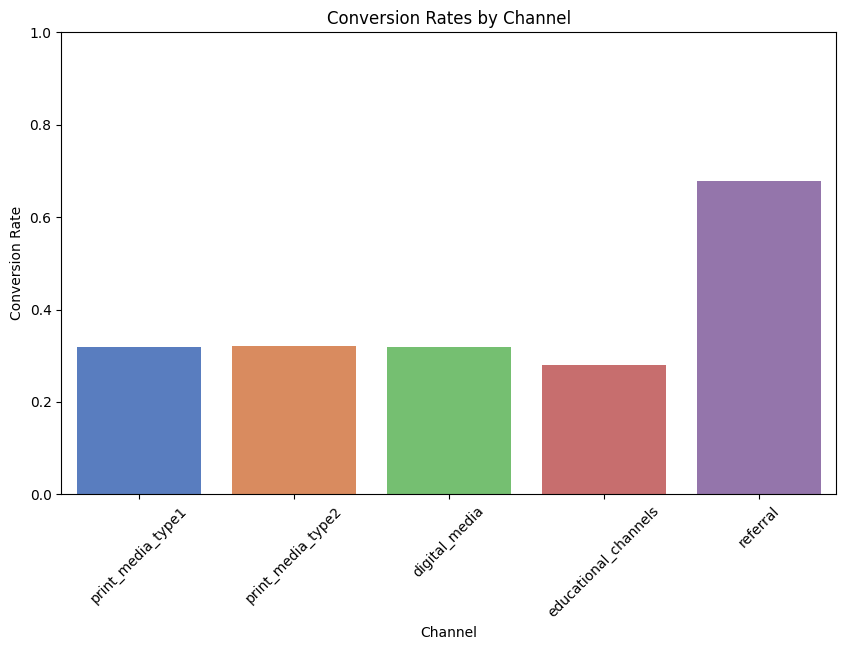

Optimization terminated successfully.
         Current function value: 0.602872
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                 4612
Model:                          Logit   Df Residuals:                     4606
Method:                           MLE   Df Model:                            5
Date:                Sun, 21 Apr 2024   Pseudo R-squ.:                 0.01111
Time:                        10:26:37   Log-Likelihood:                -2780.4
converged:                       True   LL-Null:                       -2811.7
Covariance Type:            nonrobust   LLR p-value:                 3.714e-12
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.9032      0.040    -22.787      0.000      -0.981      -0.826

In [17]:
# Convert 'yes'/'no' strings to binary (1/0) integers
binary_mapping = {'Yes': 1, 'No': 0}
df_mapped = df_copy[['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral', 'status']].replace(
    binary_mapping)

# Calculate conversion rates for each channel
channels = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
conversion_rates = {channel: df_mapped[df_mapped[channel] == 1]['status'].mean() for channel in channels}

# Explicitly convert columns to integer type to avoid dtype issues
for column in df_mapped.columns:
    df_mapped[column] = df_mapped[column].astype(int)

# Visualization with a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(conversion_rates.keys()), y=list(conversion_rates.values()), palette='muted')
plt.title('Conversion Rates by Channel')
plt.xlabel('Channel')
plt.ylabel('Conversion Rate')
plt.ylim(0, 1)  # Normalize the y-axis to show proportions
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

# Prepare data for logistic regression
X = df_mapped[channels]  # Independent variables
y = df_mapped['status']  # Dependent variable
X = sm.add_constant(X)  # Adding a constant to the model

# Logistic regression model
model = sm.Logit(y, X)
results = model.fit()

# Print the logistic regression results
print(results.summary())


The model suggests that among the examined channels, referrals are significantly effective in increasing the probability of lead conversion, while other channels (print media types 1 and 2, digital media, and educational channels) do not show statistically significant effects.

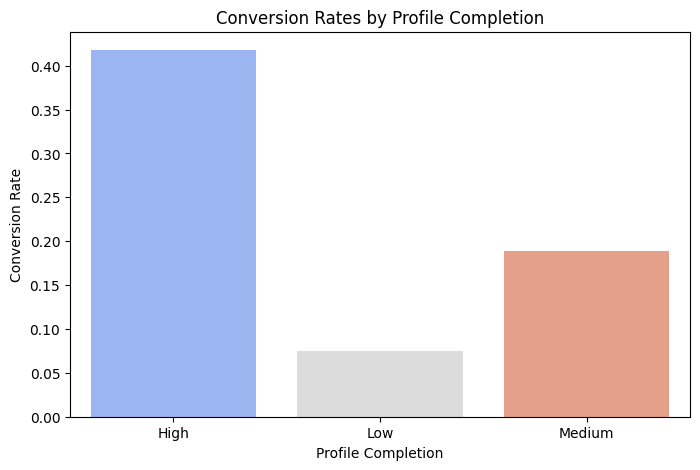

Chi-squared Test results:
Chi-squared statistic: 308.4293372457932
Degrees of freedom: 2
P-value: 1.0602795584134175e-67
There is a statistically significant association between profile completion and lead status.


In [18]:
# Group by profile completion and calculate conversion rates
conversion_rates = df.groupby('profile_completed')['status'].mean()

# Visualization with a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette='coolwarm')
plt.title('Conversion Rates by Profile Completion')
plt.xlabel('Profile Completion')
plt.ylabel('Conversion Rate')
plt.show()

# Prepare data for chi-squared test
contingency_table = pd.crosstab(df['profile_completed'], df['status'])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-squared test
print(f"Chi-squared Test results:\nChi-squared statistic: {chi2}\nDegrees of freedom: {dof}\nP-value: {p_value}")

# Evaluate the significance
if p_value < 0.05:
    print("There is a statistically significant association between profile completion and lead status.")
else:
    print("No statistically significant association was found between profile completion and lead status.")


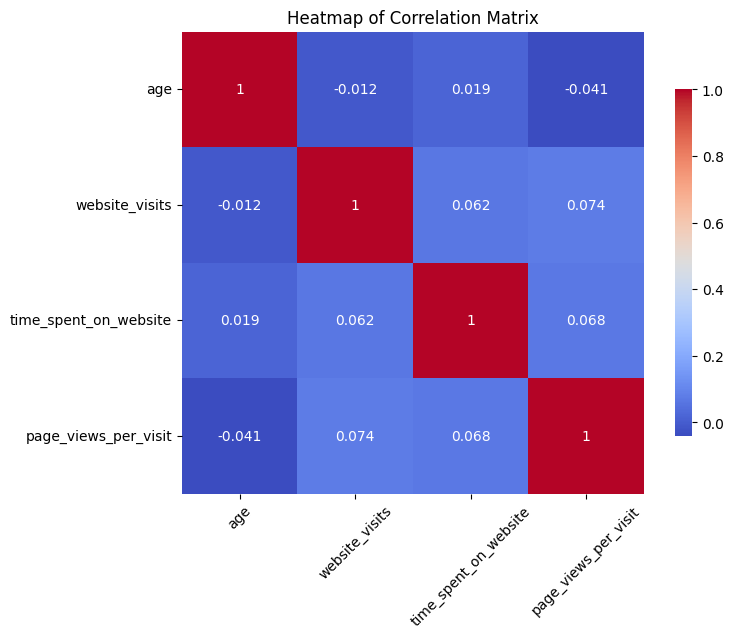

In [19]:
# Create heatmap

# Compute the correlation matrix
corr_matrix = df[num_cols].corr()

# Generate a heatmap
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .75})
plt.title('Heatmap of Correlation Matrix')  # Title for the heatmap
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.yticks(rotation=0)  # Keep the y-axis labels horizontal
plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [20]:
# Missing Value
df.isna().sum()

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

Explained Variance Ratio: [0.28491457 0.25425785]


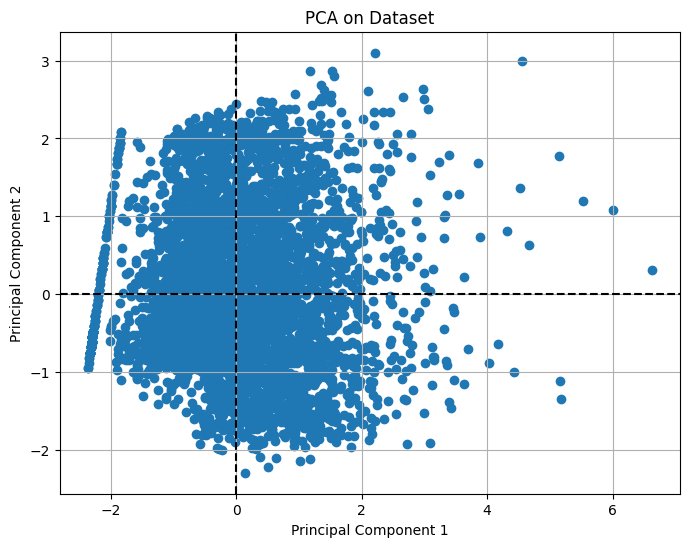

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardizing the Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_copy[num_cols])

# PCA Transformation
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plot the principal components
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Dataset')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.grid(True)
plt.show()



### Breakdown of the Interpretation

1. **First Principal Component (PC1)**:
   - **Explained Variance Ratio: 0.28491457 (or 28.49%)**
   - This value indicates that the first principal component captures about 28.49% of the variance in your dataset. This is a measure of how much information (or variability) in the dataset is represented by this first component.

2. **Second Principal Component (PC2)**:
   - **Explained Variance Ratio: 0.25425785 (or 25.43%)**
   - The second principal component accounts for approximately 25.43% of the variance. This component captures additional information that is not captured by the first component.

### Combined Interpretation

- **Total Variance Explained by PC1 and PC2**: 28.49% + 25.43% = 53.92%
- Together, the first two principal components explain about 53.92% of the total variance in the dataset. This means that slightly more than half of the dataset's information (as measured by variance) is compressed into these two components.
- The remaining 46.08% of the variance is spread across other dimensions (not covered by these two components), which may be captured if more components are included.



In [22]:
df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [23]:
# Columns need to be dummy
to_get_dummies = ['current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'print_media_type1',
 'print_media_type2',
 'digital_media',
 'educational_channels',
 'referral']

In [24]:
# Creating dummy variables for X
df = pd.get_dummies(data = df, columns = to_get_dummies, drop_first = True)


In [25]:
# Separating the target variable and other variables

Y = df.status

X = df.drop(['status'], axis = 1)

In [26]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [27]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)


In [28]:
# Creating metric function

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Attriate', 'Attriate'], yticklabels = ['Not Attriate', 'Attriate'])
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [29]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

## Building a Decision Tree model

## Model Performance evaluation and improvement

## Building a Random Forest model

## Model Performance evaluation and improvement

## Actionable Insights and Recommendations